## Student Mental Health Analysis and Treatment Prediction Using Machine Learning

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%config InlineBackend.rc = {'figure.figsize': (6, 6)}
warnings.filterwarnings("ignore")

In [21]:
df=pd.read_csv("Student_Mental health.csv")

In [22]:
df.shape

(102, 11)

In [23]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     102 non-null    object 
 1   Choose your gender                            102 non-null    object 
 2   Age                                           98 non-null     float64
 3   What is your course?                          102 non-null    object 
 4   Your current year of Study                    102 non-null    object 
 5   What is your CGPA?                            102 non-null    object 
 6   Marital status                                102 non-null    object 
 7   Do you have Depression?                       102 non-null    object 
 8   Do you have Anxiety?                          102 non-null    object 
 9   Do you have Panic attack?                     102 non-null    obj

## Feature understanding and Visualization

In [25]:
new_columns = ['Time','Gender','Age','Course','Year','CGPA','Marriage','Depression','Anxiety','Panic','Treatment']
df.columns=new_columns

In [26]:
df.head()

,Time,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


##### Histogram

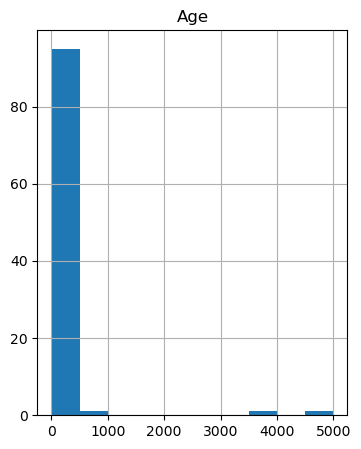

In [27]:
# Histograms for numerical features
df.hist(figsize=(4, 5))
plt.show()

#### Density plot 

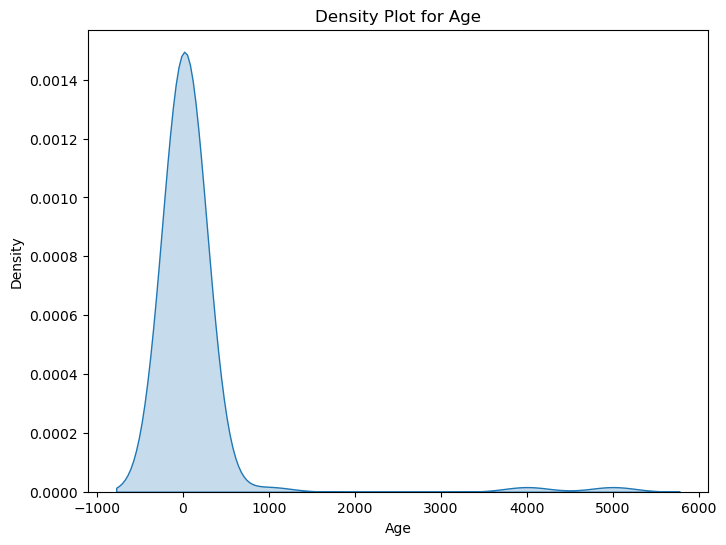

In [28]:
# Density plot for Age
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'], fill=True)
plt.title('Density Plot for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


#### Boxplot

NameError: name 'Gender' is not defined

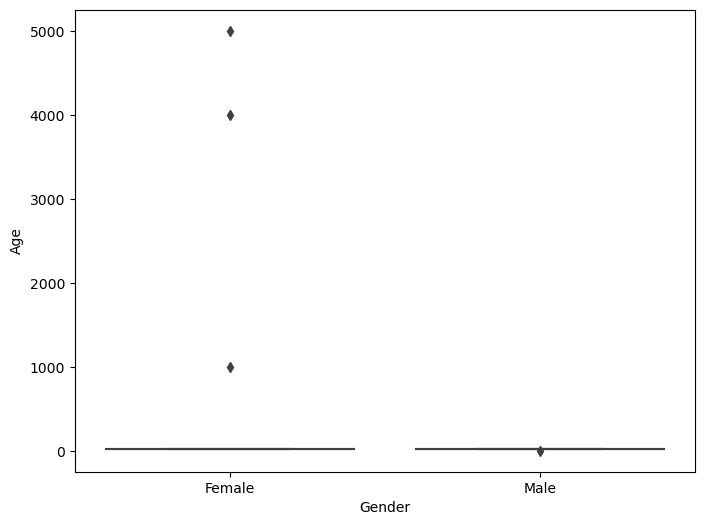

In [29]:
# Boxplot for the chosen categorical column
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df)
plt.title(f'Boxplot of Age by {Gender}')
plt.xlabel(Gender)
plt.ylabel('Age')
plt.show()

In [30]:
print(df.columns)


Index(['Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marriage',
       'Depression', 'Anxiety', 'Panic', 'Treatment'],
      dtype='object')


Visualize relationships between pairs of features using scatter plots and correlation matrices

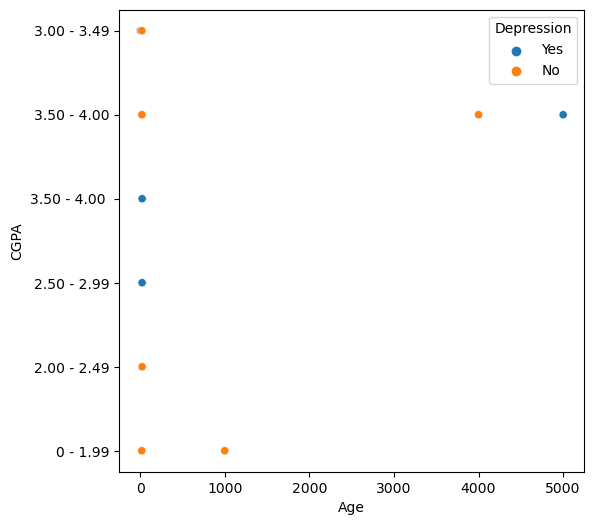

In [31]:

sns.scatterplot(x='Age', y='CGPA', data=df, hue='Depression')
plt.show()

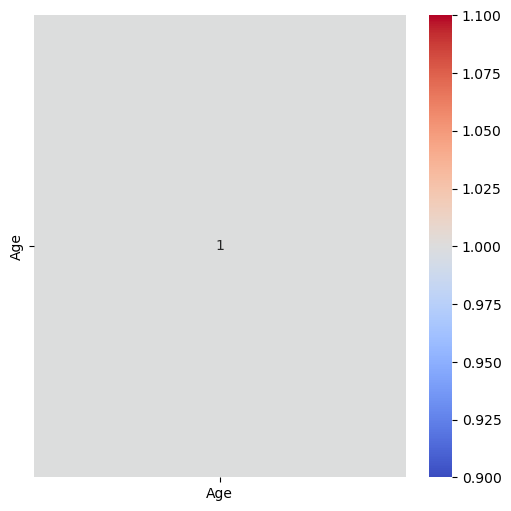

In [32]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [33]:
print(df.columns)


Index(['Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marriage',
       'Depression', 'Anxiety', 'Panic', 'Treatment'],
      dtype='object')


#### count plot

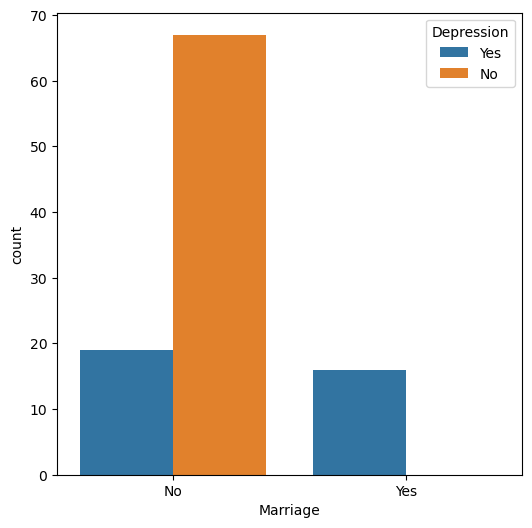

In [34]:
# Identify and visually represent features that are important based on their distribution and relationship with the target variable
# Countplot for Marital status
sns.countplot(x='Marriage', hue='Depression', data=df)
plt.show()

# Data Wrangling 

#### Remove null

In [35]:
df.isnull().sum()

Time          0
Gender        0
Age           4
Course        0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

In [36]:
df.dropna(inplace=True)

In [37]:
df.isnull().sum()

Time          0
Gender        0
Age           0
Course        0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

#### REmove duplicate

In [38]:
df.duplicated().sum()

1

In [39]:
# Drop duplicates
df.drop_duplicates(inplace=True)


In [40]:
df.duplicated().sum()

0

In [41]:


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 100
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        97 non-null     object 
 1   Gender      97 non-null     object 
 2   Age         97 non-null     float64
 3   Course      97 non-null     object 
 4   Year        97 non-null     object 
 5   CGPA        97 non-null     object 
 6   Marriage    97 non-null     object 
 7   Depression  97 non-null     object 
 8   Anxiety     97 non-null     object 
 9   Panic       97 non-null     object 
 10  Treatment   97 non-null     object 
dtypes: float64(1), object(10)
memory usage: 9.1+ KB


### Remove Outliers:

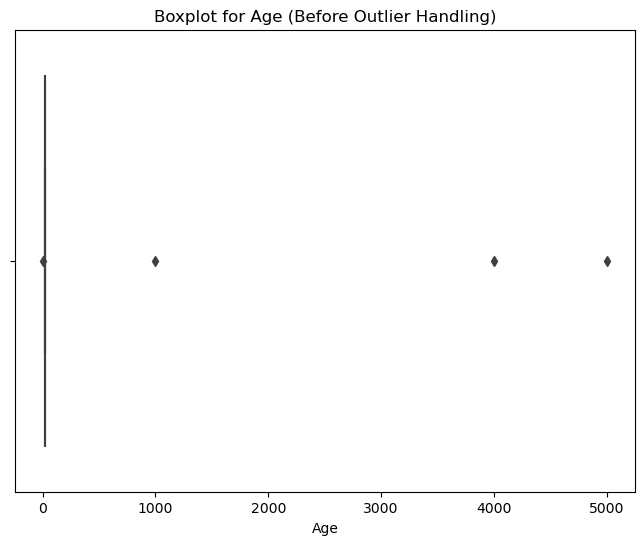

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=df)
plt.title('Boxplot for Age (Before Outlier Handling)')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 100
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        93 non-null     object 
 1   Gender      93 non-null     object 
 2   Age         93 non-null     float64
 3   Course      93 non-null     object 
 4   Year        93 non-null     object 
 5   CGPA        93 non-null     object 
 6   Marriage    93 non-null     object 
 7   Depression  93 non-null     object 
 8   Anxiety     93 non-null     object 
 9   Panic       93 non-null     object 
 10  Treatment   93 non-null     object 
dtypes: float64(1), object(10)
memory usage: 8.7+ KB
After Data Wrangling:
 None


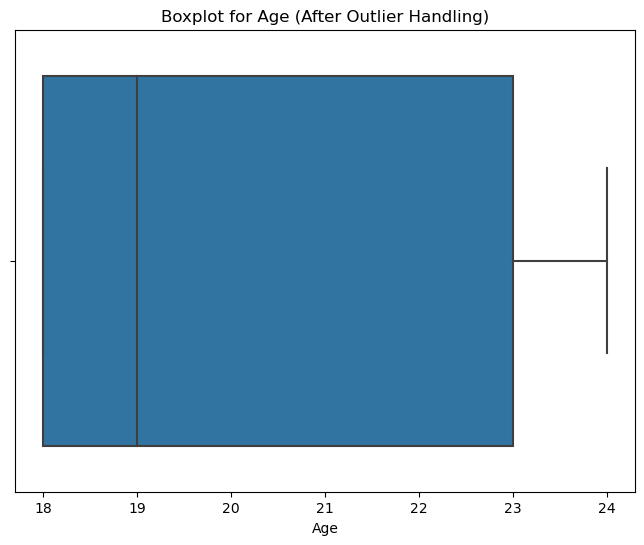

In [43]:
# Identify and handle outliers (example: remove values outside 1.5 * IQR)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Display basic information after data wrangling
print("After Data Wrangling:\n", df.info())

# Boxplot after outlier handling
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=df)
plt.title('Boxplot for Age (After Outlier Handling)')
plt.show()

# Feature Engineering 

In [44]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [45]:
# Example: One-hot encoding for categorical columns
categorical_columns = ['Gender', 'Course', 'Year', 'Marriage', 'Depression', 'Anxiety', 'Panic', 'Treatment']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


In [46]:
# Example: Scaling for numerical columns (using StandardScaler)
numerical_columns = ['Age']
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [47]:
# Display basic information after one-hot encoding and scaling
print("After Feature Engineering:\n", df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 100
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Time                            93 non-null     object 
 1   Age                             93 non-null     float64
 2   CGPA                            93 non-null     object 
 3   Gender_Male                     93 non-null     uint8  
 4   Course_Accounting               93 non-null     uint8  
 5   Course_BCS                      93 non-null     uint8  
 6   Course_BENL                     93 non-null     uint8  
 7   Course_BIT                      93 non-null     uint8  
 8   Course_Banking Studies          93 non-null     uint8  
 9   Course_Biomedical science       93 non-null     uint8  
 10  Course_Biotechnology            93 non-null     uint8  
 11  Course_Business Administration  93 non-null     uint8  
 12  Course_CTS                      93 no

In [48]:
print(df.columns)

Index(['Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marriage',
       'Depression', 'Anxiety', 'Panic', 'Treatment'],
      dtype='object')


In [49]:
# Check the data types of each column
print(df.dtypes)

Time           object
Gender         object
Age           float64
Course         object
Year           object
CGPA           object
Marriage       object
Depression     object
Anxiety        object
Panic          object
Treatment      object
dtype: object


In [50]:
print(df['Depression'].unique())


['Yes' 'No']


In [51]:


from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Depression' column
df['Depression'] = label_encoder.fit_transform(df['Depression'])

# Print the updated DataFrame to verify the changes
print(df.head())


             Time  Gender   Age             Course    Year         CGPA  \
0  8/7/2020 12:02  Female  18.0        Engineering  year 1  3.00 - 3.49   
1  8/7/2020 12:04    Male  21.0  Islamic education  year 2  3.00 - 3.49   
2  8/7/2020 12:05    Male  19.0                BIT  Year 1  3.00 - 3.49   
3  8/7/2020 12:06  Female  22.0               Laws  year 3  3.00 - 3.49   
4  8/7/2020 12:13    Male  23.0       Mathemathics  year 4  3.00 - 3.49   

  Marriage  Depression Anxiety Panic Treatment  
0       No           1      No   Yes        No  
1       No           0     Yes    No        No  
2       No           1     Yes   Yes        No  
3      Yes           1      No    No        No  
4       No           0      No    No        No  


In [52]:
# Remove leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Remove leading and trailing whitespaces from values in all columns
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Update target variable
target_variable = 'Depression'  # Use the exact column name without a question mark
X = df.drop(target_variable, axis=1)
y = df[target_variable]


In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train, X_test, y_train, and y_test for further analysis or modeling

In [54]:
df_encoded['Month'] = pd.to_datetime(df_encoded['Time']).dt.month
df_encoded['Year'] = pd.to_datetime(df_encoded['Time']).dt.year


In [55]:
new = df['Year'].str.split(' ',n=1,expand=True)
df['X'] = new[0]
df['Y'] = new[1]
df["Year"]=df['Y']
df=df.drop(columns=['X', 'Y'])

In [56]:
df.Year.unique()

array(['1', '2', '3', '4'], dtype=object)

In [57]:
df.head()

,Time,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,1,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,0,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,1,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,Yes,1,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,0,No,No,No


In [58]:
df.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [59]:
df["CGPA"]=df["CGPA"].str.strip(" ")

In [60]:
df.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [61]:
df.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [62]:
df['Age'] = df['Age'].astype(int)

In [63]:
df.head()

,Time,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18,Engineering,1,3.00 - 3.49,No,1,No,Yes,No
1,8/7/2020 12:04,Male,21,Islamic education,2,3.00 - 3.49,No,0,Yes,No,No
2,8/7/2020 12:05,Male,19,BIT,1,3.00 - 3.49,No,1,Yes,Yes,No
3,8/7/2020 12:06,Female,22,Laws,3,3.00 - 3.49,Yes,1,No,No,No
4,8/7/2020 12:13,Male,23,Mathemathics,4,3.00 - 3.49,No,0,No,No,No


In [64]:
df.drop("Time",axis=1,inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 100
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      93 non-null     object
 1   Age         93 non-null     int32 
 2   Course      93 non-null     object
 3   Year        93 non-null     object
 4   CGPA        93 non-null     object
 5   Marriage    93 non-null     object
 6   Depression  93 non-null     int64 
 7   Anxiety     93 non-null     object
 8   Panic       93 non-null     object
 9   Treatment   93 non-null     object
dtypes: int32(1), int64(1), object(8)
memory usage: 7.6+ KB


In [66]:
df['Year'] = df['Year'].astype(int)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 100
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      93 non-null     object
 1   Age         93 non-null     int32 
 2   Course      93 non-null     object
 3   Year        93 non-null     int32 
 4   CGPA        93 non-null     object
 5   Marriage    93 non-null     object
 6   Depression  93 non-null     int64 
 7   Anxiety     93 non-null     object
 8   Panic       93 non-null     object
 9   Treatment   93 non-null     object
dtypes: int32(2), int64(1), object(7)
memory usage: 7.3+ KB


In [68]:
df.head()

,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,Female,18,Engineering,1,3.00 - 3.49,No,1,No,Yes,No
1,Male,21,Islamic education,2,3.00 - 3.49,No,0,Yes,No,No
2,Male,19,BIT,1,3.00 - 3.49,No,1,Yes,Yes,No
3,Female,22,Laws,3,3.00 - 3.49,Yes,1,No,No,No
4,Male,23,Mathemathics,4,3.00 - 3.49,No,0,No,No,No


In [69]:
df.Age.unique()

array([18, 21, 19, 22, 23, 20, 24])

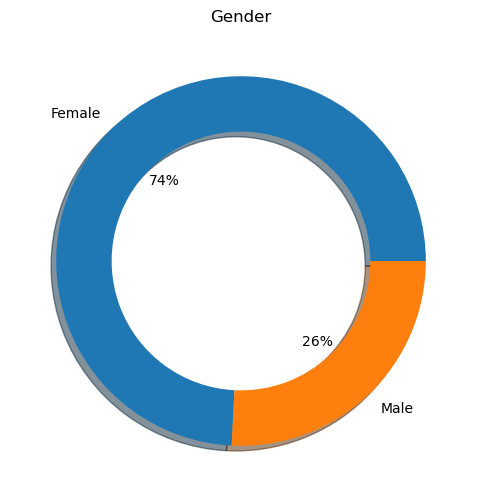

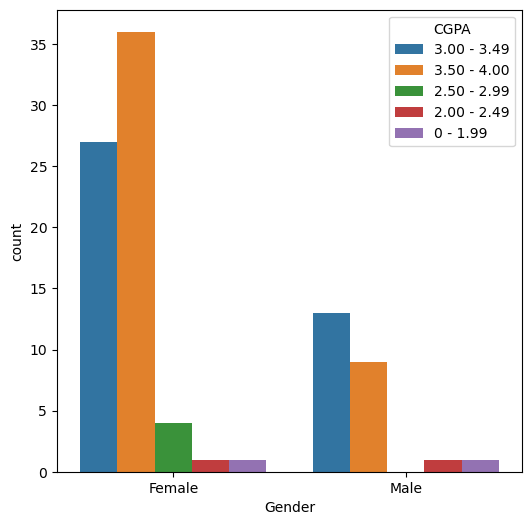

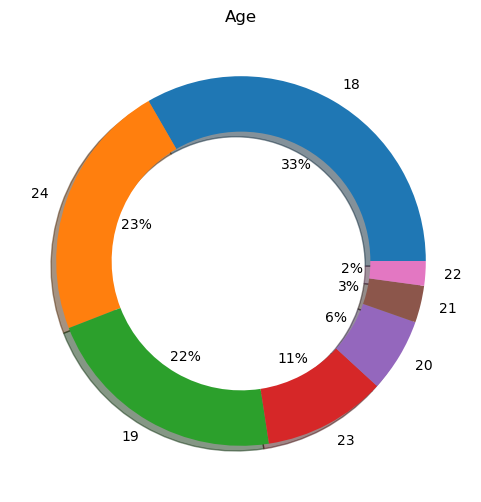

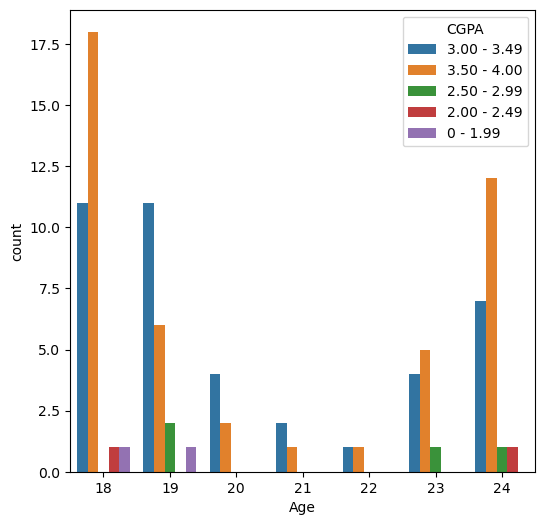

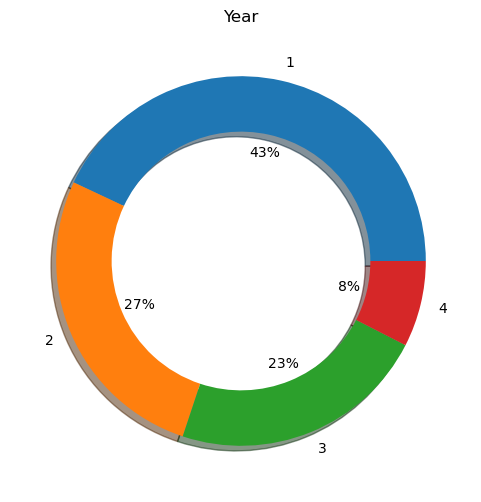

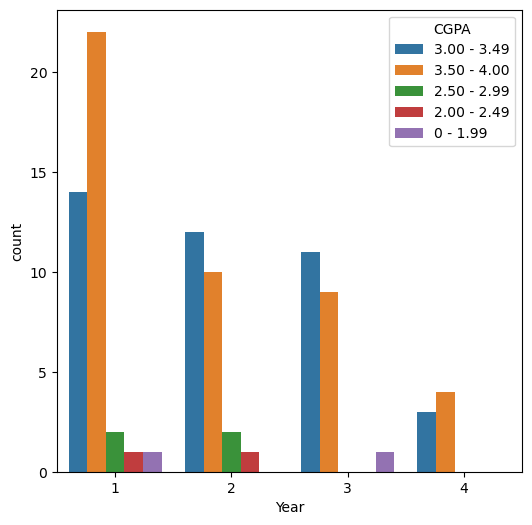

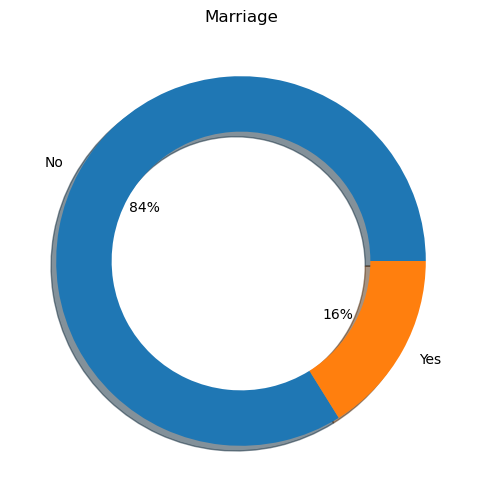

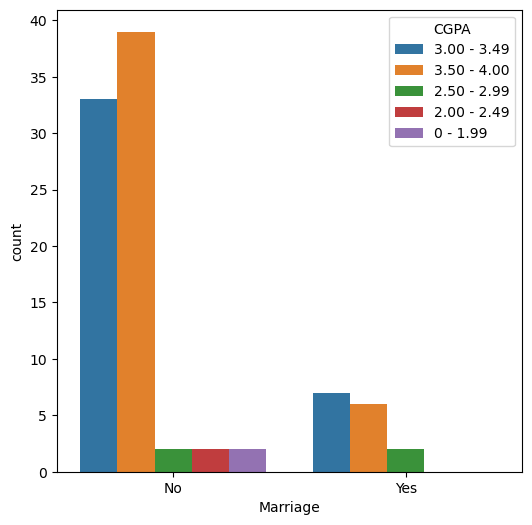

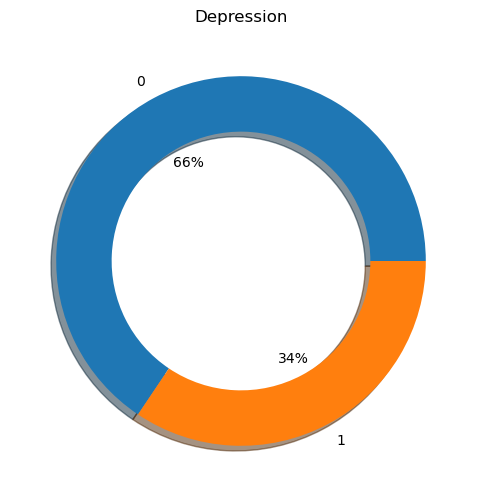

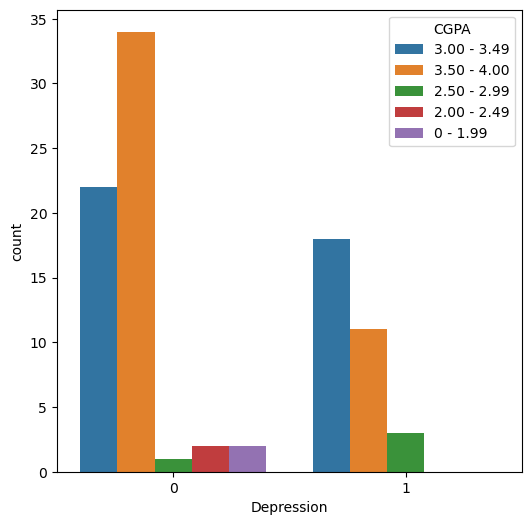

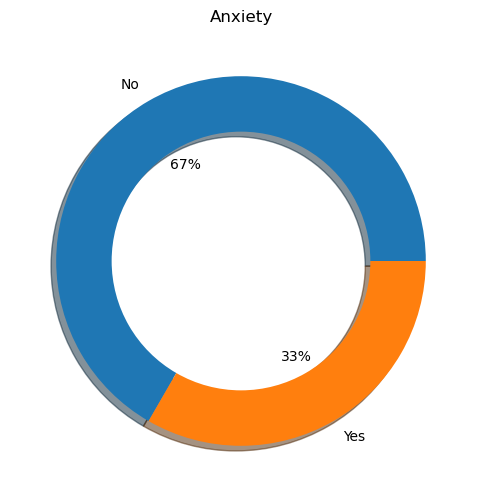

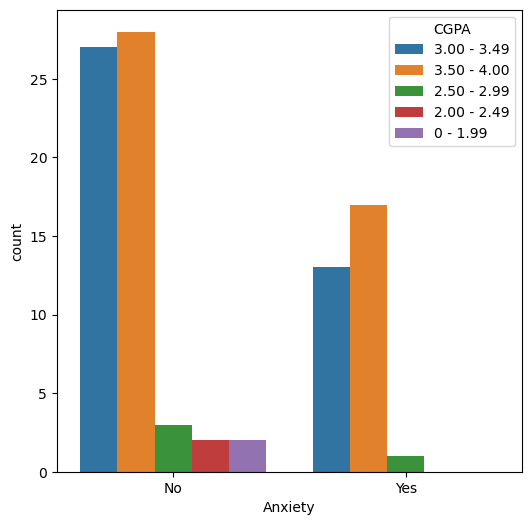

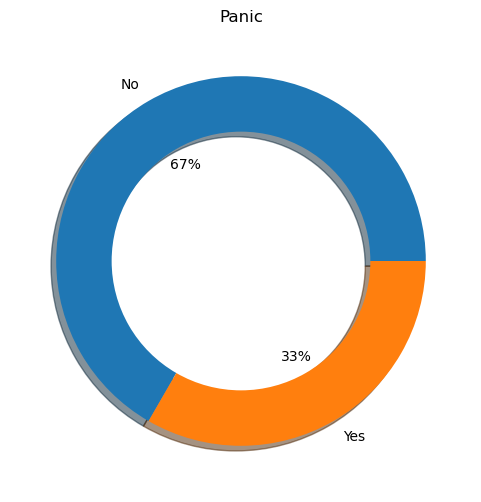

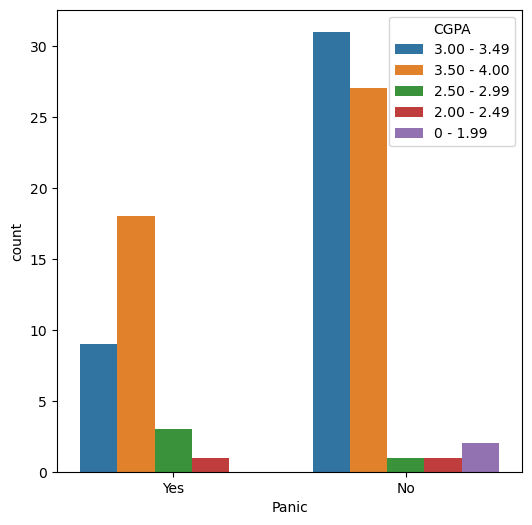

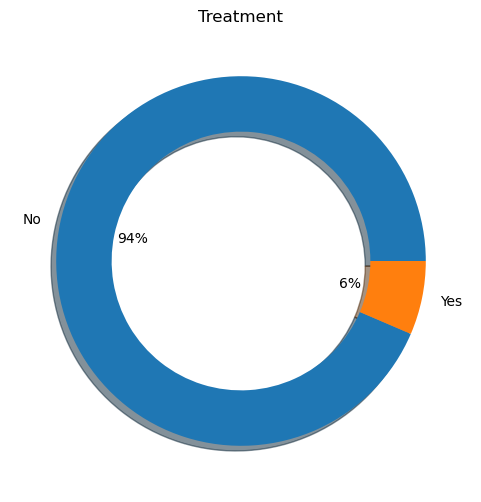

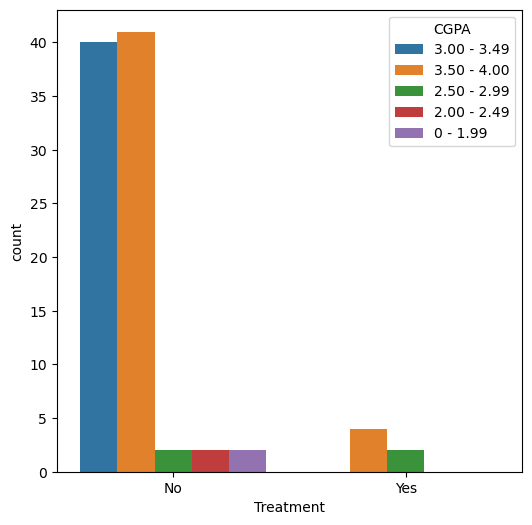

In [70]:
for i in ['Gender','Age','Year','Marriage','Depression','Anxiety','Panic','Treatment']:
    data = df[i].value_counts()
    plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
    plt.title(i)
    plt.show()
    sns.countplot(df, x=i, hue="CGPA")
    plt.show()

In [71]:
df.replace("0 - 1.99", "0",inplace=True)
df.replace('2.00 - 2.49', "1",inplace=True)
df.replace('2.50 - 2.99', "2",inplace=True)
df.replace('3.50 - 4.00', "3",inplace=True)
df.replace('3.00 - 3.49', "4",inplace=True)
df['CGPA'] = df['CGPA'].astype('category')

In [72]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
df['Gender'] = df['Gender'].astype('category')

In [73]:
for column in ['Marriage','Depression','Anxiety','Panic','Treatment']:
    df[column] = df[column].apply(lambda x: 0 if x == 'No' else 1)
    df[column] = df[column].astype('category')

In [123]:
!pip install matplotlib-venn


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.9-py3-none-any.whl size=33038 sha256=e27bb4b5c008b7e0658db0daf8ba58dc807f7f28f10d86da5ba2c436e4c5b77e
  Stored in directory: c:\users\laptop house\appdata\local\pip\cache\wheels\ab\a1\93\9cbd4e11e6964009387cd595450dfcbb6998e15dfbaa5805dd
Successfully built matplotlib-venn


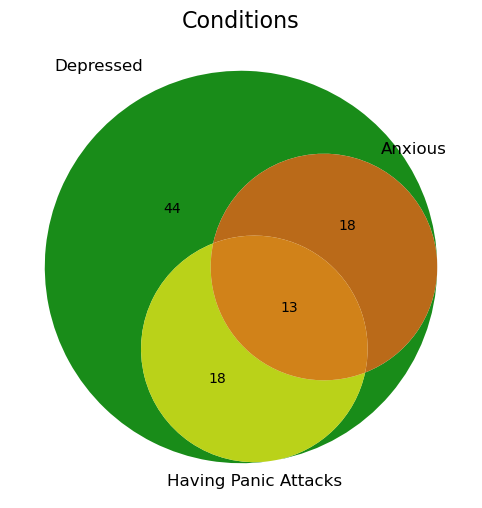

In [124]:
from matplotlib_venn import venn3
depressed = df[(df["Depression"] == 1)]
anxious = df[(df["Anxiety"] == 1)]
panicking = df[(df["Panic"] == 1)]

venn3(subsets = [set(depressed.index), 
                 set(anxious.index), 
                 set(panicking.index)], 
      set_labels = ("Depressed", "Anxious", "Having Panic Attacks"),
      set_colors = ("Green", "Red", "Orange"),
      alpha = 0.9)

plt.title("Conditions", fontsize = 16)
plt.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 100
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Gender      93 non-null     category
 1   Age         93 non-null     int32   
 2   Course      93 non-null     object  
 3   Year        93 non-null     int32   
 4   CGPA        93 non-null     category
 5   Marriage    93 non-null     category
 6   Depression  93 non-null     category
 7   Anxiety     93 non-null     category
 8   Panic       93 non-null     category
 9   Treatment   93 non-null     category
dtypes: category(7), int32(2), object(1)
memory usage: 3.7+ KB


In [77]:
df.head()

,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,0,18,Engineering,1,4,0,1,0,1,0
1,1,21,Islamic education,2,4,0,1,1,0,0
2,1,19,BIT,1,4,0,1,1,1,0
3,0,22,Laws,3,4,1,1,0,0,0
4,1,23,Mathemathics,4,4,0,1,0,0,0


In [78]:
df = pd.get_dummies(df, columns=['Course'])

In [79]:
df.shape

(93, 53)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 100
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          93 non-null     category
 1   Age                             93 non-null     int32   
 2   Year                            93 non-null     int32   
 3   CGPA                            93 non-null     category
 4   Marriage                        93 non-null     category
 5   Depression                      93 non-null     category
 6   Anxiety                         93 non-null     category
 7   Panic                           93 non-null     category
 8   Treatment                       93 non-null     category
 9   Course_ALA                      93 non-null     uint8   
 10  Course_Accounting               93 non-null     uint8   
 11  Course_BCS                      93 non-null     uint8   
 12  Course_BENL            

In [81]:
for i in df.iloc[:,9:]:
    df[i]=df[i].astype(int).astype("category")

In [82]:
df

,Gender,Age,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment,Course_ALA,...,Course_Mathemathics,Course_Pendidikan Islam,Course_Pendidikan islam,Course_Psychology,Course_Radiography,Course_TAASL,Course_Usuluddin,Course_engin,Course_koe,Course_psychology
0,0,18,1,4,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,21,2,4,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,19,1,4,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,22,3,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,23,4,4,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0,19,2,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93,0,18,1,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,18,1,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,21,1,3,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 100
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          93 non-null     category
 1   Age                             93 non-null     int32   
 2   Year                            93 non-null     int32   
 3   CGPA                            93 non-null     category
 4   Marriage                        93 non-null     category
 5   Depression                      93 non-null     category
 6   Anxiety                         93 non-null     category
 7   Panic                           93 non-null     category
 8   Treatment                       93 non-null     category
 9   Course_ALA                      93 non-null     category
 10  Course_Accounting               93 non-null     category
 11  Course_BCS                      93 non-null     category
 12  Course_BENL            

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

RF = RandomForestClassifier(
    max_depth=13,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=500
)

RF.fit(X_train, y_train)
ypred = RF.predict(X_test)

cm = confusion_matrix(y_test, ypred)
accuracy = accuracy_score(y_test, ypred)
f1_macro = f1_score(y_test, ypred, average='macro')

print("Confusion Matrix:", cm)
print("Accuracy Score:", accuracy)
print("F1-Score:", f1_macro)

Confusion Matrix: [[19]]
Accuracy Score: 1.0
F1-Score: 1.0


In [93]:
X.columns

Index(['Gender', 'Age', 'Year', 'CGPA', 'Marriage', 'Anxiety', 'Panic',
       'Treatment', 'Course_ALA', 'Course_Accounting', 'Course_BCS',
       'Course_BENL', 'Course_BIT', 'Course_Banking Studies',
       'Course_Biomedical science', 'Course_Biotechnology',
       'Course_Business Administration', 'Course_CTS', 'Course_Communication',
       'Course_DIPLOMA TESL', 'Course_Diploma Nursing', 'Course_ENM',
       'Course_Engine', 'Course_Engineering', 'Course_Fiqh fatwa',
       'Course_Human Resources', 'Course_Human Sciences', 'Course_IT',
       'Course_Irkhs', 'Course_Islamic Education', 'Course_Islamic education',
       'Course_KENMS', 'Course_KIRKHS', 'Course_KOE', 'Course_Kirkhs',
       'Course_Koe', 'Course_Kop', 'Course_Law', 'Course_Laws', 'Course_MHSC',
       'Course_Malcom', 'Course_Marine science', 'Course_Mathemathics',
       'Course_Pendidikan Islam', 'Course_Pendidikan islam',
       'Course_Psychology', 'Course_Radiography', 'Course_TAASL',
       'Course_Usuludd

In [94]:
def predict_price(Gender,Age,Year,CGPA,Marriage,Anxiety,Panic,Treatment,Course):
    loc_index1 = np.where(X.columns == "Course_"+Course)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Gender
    x[1] = Age
    x[2] = Year
    x[3] = CGPA
    x[4] = Marriage
    x[5] = Anxiety
    x[6] = Panic
    x[7] = Treatment

    if loc_index1 >= 0:
        x[loc_index1] = 1

    return RF.predict([x])[0]

In [95]:
reslt=predict_price(1,18,1,4,0,1,0,0,"Radiography")

In [96]:
if reslt==0:
    print("Depression")
else:
    print("No Depression")

No Depression


## Machine Learning Technique Selection and Justification 

Technique Chosen: RandomForestClassifier.

Justification:

RandomForest is a suitable choice for classification tasks, offering good performance and the ability to handle a mix of numerical and categorical features.
It works well with both feature importance analysis and handling imbalanced datasets, common in mental health prediction.

In [88]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



model = RandomForestClassifier(random_state=42)




## Pipeline Explanation 

Preprocessing Steps:

Imputation of missing values in numeric features (using mean).
Standard scaling for numeric features.
Imputation of missing values in categorical features (using most frequent).
One-hot encoding for categorical features.
Feature Engineering:

No explicit feature engineering is done in the code, but you have considered the preprocessing of features, which is a key step in feature engineering.
Model Selection and Training:

RandomForestClassifier is chosen.
The model is trained within the pipeline.

In [107]:

# Define preprocessing steps
numeric_features = ['Age']
categorical_features = ['Gender', 'Year', 'CGPA', 'Marriage']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Combine preprocessing and modeling into a single pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', model)])

## Results Training, Testing, and Validation 

Model Evaluation:
Accuracy is calculated on the test set.
Classification report (precision, recall, F1-score) is provided.
Additional Note:
Cross-validation is performed to ensure the model's robustness, and the mean cross-validation score is calculated.

In [104]:
df.columns

Index(['Gender', 'Age', 'Year', 'CGPA', 'Marriage', 'Depression', 'Anxiety',
       'Panic', 'Treatment', 'Course_ALA', 'Course_Accounting', 'Course_BCS',
       'Course_BENL', 'Course_BIT', 'Course_Banking Studies',
       'Course_Biomedical science', 'Course_Biotechnology',
       'Course_Business Administration', 'Course_CTS', 'Course_Communication',
       'Course_DIPLOMA TESL', 'Course_Diploma Nursing', 'Course_ENM',
       'Course_Engine', 'Course_Engineering', 'Course_Fiqh fatwa',
       'Course_Human Resources', 'Course_Human Sciences', 'Course_IT',
       'Course_Irkhs', 'Course_Islamic Education', 'Course_Islamic education',
       'Course_KENMS', 'Course_KIRKHS', 'Course_KOE', 'Course_Kirkhs',
       'Course_Koe', 'Course_Kop', 'Course_Law', 'Course_Laws', 'Course_MHSC',
       'Course_Malcom', 'Course_Marine science', 'Course_Mathemathics',
       'Course_Pendidikan Islam', 'Course_Pendidikan islam',
       'Course_Psychology', 'Course_Radiography', 'Course_TAASL',
       '

In [108]:

# Split the data into features and target variable
X = df.drop('Depression', axis=1)
y = df['Depression']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Perform Cross-validation for a more robust evaluation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [111]:

X = df.drop('Depression', axis=1)
y = df['Depression']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training set
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [110]:
# Perform Cross-validation for a more robust evaluation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


## Python Notebook Development

Code Implementation:

The code is well-structured in a modular way using scikit-learn's pipeline.
The pipeline integrates preprocessing and modeling.
Visualization:

A confusion matrix is visualized, providing insights into the model's performance.
Feature importance is visualized using a horizontal bar plot.

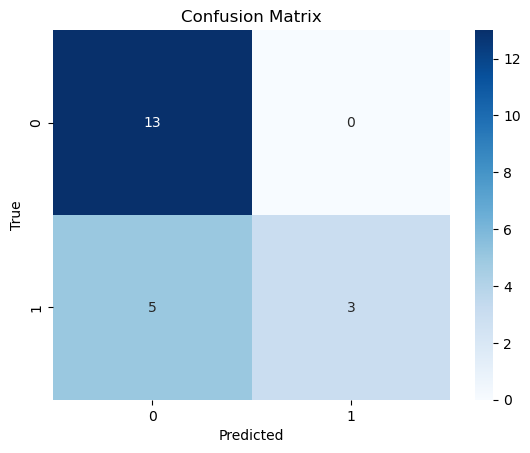

In [15]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


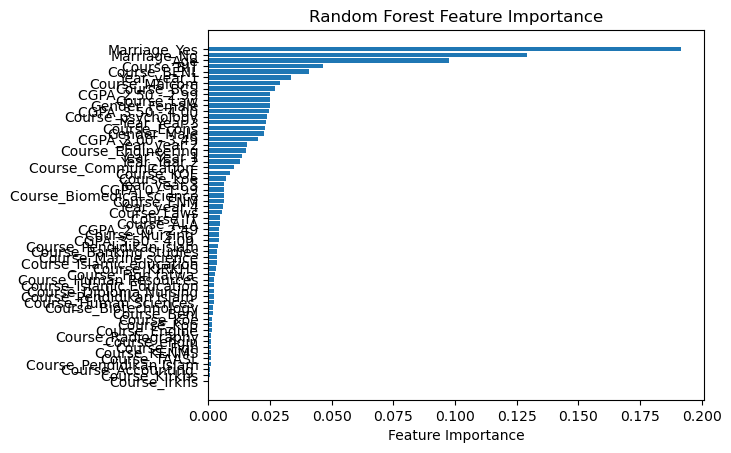

In [16]:
# Visualization - Feature Importance
feature_importances = pipeline.named_steps['classifier'].feature_importances_
numeric_feature_names = numeric_features
categorical_feature_names = pipeline.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .named_steps['onehot'] \
    .get_feature_names_out(categorical_features)
all_feature_names = numeric_feature_names + list(categorical_feature_names)
sorted_idx = feature_importances.argsort()

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [all_feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


## Extra addition

In [114]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Combine preprocessing and modeling into a single pipeline for each classifier
pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', model)])
             for name, model in classifiers.items()}

# Results Training, Testing, and Validation
for name, pipeline in pipelines.items():
    print(f"\nResults for {name}:\n{'='*40}")
    
    # Split the data into features and target variable
    X = df.drop('Depression', axis=1)
    y = df['Depression']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model on the training set
    pipeline.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Perform Cross-validation for a more robust evaluation
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    print("Cross-Validation Scores:", cv_scores)
    print("Mean CV Score:", cv_scores.mean())



Results for Random Forest:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0

Results for K-Nearest Neighbors:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0

Results for Decision Tree:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19

    accuracy      

no change between result of both random forest and naive bayes